In [18]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

In [19]:
A = 0.0; B = 1.0; T = 1        # границы
h = 0.05; tau = 0.002     # размеры шага по времени и координате
M = int ((B-A)/h)          # количество узлов по координате
N = int(T / tau)              # количество узлов по времени
u1 = np.zeros(M+1)
u2 = np.zeros(M+1)
x = np.linspace(A, B, M+1)
nu = .25

In [20]:
x0 = 0.5; t0 = -0.05

In [21]:
def xi(x, t, nu, x0, t0):
    return (x-x0)/(2*(nu*(t-t0)) ** (0.5))

In [22]:
def u_acc(x, t, nu, x0, t0): #точное решение
    return ((4*nu)/(math.pi*(t-t0))) ** (0.5)*math.exp(-(xi(x,t,nu, x0,t0))**2)/math.erfc(xi(x, t,nu,x0,t0))

In [23]:
for i in range(M+1):
    u1[i] = u_acc(x[i], 0, nu, x0, t0)

In [24]:
cou1 = np.abs(u1).max() * tau / h
cou2 = nu * tau / h**2
print 'Hyperbolic Courant:', cou1, 'Parabolic Courant:', cou2

Hyperbolic Courant: 0.434411873833 Parabolic Courant: 0.2


In [25]:
u0 = u1.copy() #НУ
u3 = u1.copy() #Для КИР
u4 = u1.copy() #Для точного решения в момент времени 1

In [26]:
for i in range(N): # Схема Л.-В.
    u1[0] = u_acc(A, i * tau, nu, x0, t0)
    u1[M] = u_acc(B, i * tau, nu, x0, t0)
    for j in range(1, M):
        p1 = ((u1[j]) ** 2 - (u1[j+1]) ** 2) * tau / 4 / h + 0.5 * (u1[j+1] + u1[j])
        p2 = ((u1[j-1]) ** 2 - (u1[j]) ** 2) * tau / 4 / h + 0.5 * (u1[j] + u1[j-1])
        u2[j] = u1[j] + nu*tau / (h ** 2) * (u1[j+1] - 2 * u1[j] + u1[j-1]) - tau / (h * 2) * (p1 ** 2 - p2 ** 2)
    u2, u1 = u1, u2
u1[0] = u_acc(A, i * tau, nu, x0, t0)
u1[M] = u_acc(B, i * tau, nu, x0, t0)

In [27]:
for i in range(N):
    u3[0] = u_acc(A, i * tau, nu, x0, t0)
    u3[M] = u_acc(B, i * tau, nu, x0, t0)
    for j in range(1, M):
        d1 = abs(u3[j] + u3[j - 1]) / 2
        d2 = abs(u3[j] + u3[j + 1]) / 2
        val1 = (u3[j-1]**2-u3[j+1]**2)/(4*h)
        val2 = (d2*(u3[j+1]-u3[j])-d1*(u3[j]-u3[j-1]))/(2*h)
        val3 = nu*(u3[j+1]-2*u3[j]+u3[j-1])/(h**2)
        u2[j] = u3[j] + tau * (val1 + val2 + val3)
    u2,u3 = u3,u2
u3[0] = u_acc(A, i * tau, nu, x0, t0)
u3[M] = u_acc(B, i * tau, nu, x0, t0)

In [28]:
for i in range(M+1):
    u4[i] = u_acc(x[i], 1, nu, x0, t0)

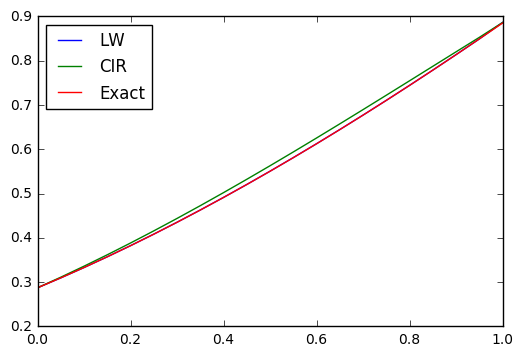

In [29]:
# plt.plot(x, u0, label='IC') #НУ
plt.plot(x, u1, label='LW') #Л.-В.
plt.plot(x, u3, label='CIR') #КИР
plt.plot(x, u4, label='Exact') #Точное решение при T= 1
plt.legend(loc='best')

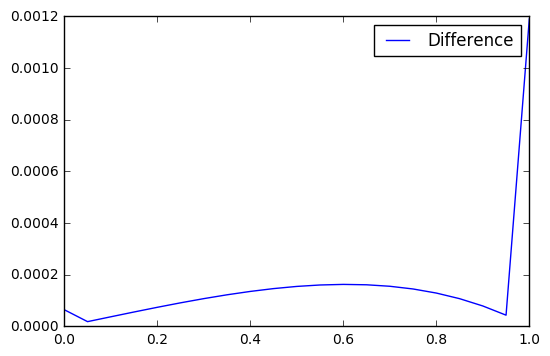

In [30]:
plt.plot(x, u1-u4, label='Difference')
#Разница м/у точным решением и решением, вычисленным при помощи схемы Л.-В. h = 0.05; tau = 0.002 
plt.legend(loc='best')